In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
! unzip '/content/drive/MyDrive/data_split.zip'


Archive:  /content/drive/MyDrive/data_split.zip
   creating: dataset/
   creating: dataset/train-data/
   creating: dataset/train-data/Gastroenterology/
  inflating: dataset/train-data/Gastroenterology/1007.txt  
  inflating: dataset/train-data/Gastroenterology/1014.txt  
  inflating: dataset/train-data/Gastroenterology/1015.txt  
  inflating: dataset/train-data/Gastroenterology/1019.txt  
  inflating: dataset/train-data/Gastroenterology/1020.txt  
  inflating: dataset/train-data/Gastroenterology/1022.txt  
  inflating: dataset/train-data/Gastroenterology/1023.txt  
  inflating: dataset/train-data/Gastroenterology/1034.txt  
  inflating: dataset/train-data/Gastroenterology/1035.txt  
  inflating: dataset/train-data/Gastroenterology/1038.txt  
  inflating: dataset/train-data/Gastroenterology/1044.txt  
  inflating: dataset/train-data/Gastroenterology/1048.txt  
  inflating: dataset/train-data/Gastroenterology/1056.txt  
  inflating: dataset/train-data/Gastroenterology/1060.txt  
  infla

Removing tags and colons in all data in the train-data file. (Got this code from Goose) and output what it looks like after removing them in the table below.


In [ ]:
#Removing tags in reports text file: CC:, <B>,
TextList = [] #(filename, label, text)
path = '/content/dataset/train-data'
import re
for label in os.listdir(path):
    for filename in os.listdir(path+'/'+label):
        file = path+'/'+label+'/'+filename
        try:
            with open(file, 'r') as f:
                text = f.readlines()
                parsetext = [] # list containing sentences
                for sentence in text:
                    if sentence == '\n':
                        continue
                    else:
                        for badcharacter in ['<B>\w{2}:', 'CC:', '<B>', '</B>', '\n',':','&quot;','[0-9]','-','/','\w*\d\w*',',','[)(]']:
                            sentence = re.sub(badcharacter, '', sentence)
                        sentence = ''.join([s.lower() for s in sentence if not s.isdigit()])
                        sentence = sentence.replace('.', '')
                        parsetext.append(sentence)

            TextList.append((filename.strip('.txt'), label.strip(path), ''.join(parsetext)))
        except:
            pass

data = pd.DataFrame(TextList, columns = ['filename', 'label', 'text'])  



In [ ]:
data.head()

,filename,label,text
0,1621,Neurology,headache this yo rhm was moving furniture se...
1,1117,Neurology,headache yo rhf presented to her local physi...
2,1805,Neurology,reason for visit this is an yearold woman ref...
3,1423,Neurology,procedures performed phenol neurolysis right ...
4,1018,Neurology,


In [ ]:
medical_records = data.drop_duplicates(subset=['text'], keep='first')
len(medical_records)

722

In [ ]:
data.iloc[0].text

' headache this  yo rhm was moving furniture several days prior to presentation when he struck his head vertex against a door panel he then stepped back and struck his back on a trailer hitch there was no associated loc but he felt dazed he complained a ha since the accident the following day he began experiencing episodic vertigo lasting several minutes with associated nausea and vomiting he has been lying in bed most of the time since the accident he also complained of transient left lower extremity weakness the night before admission he went to his bedroom and his girlfriend heard a loud noise she found him on the floor unable to speak or move his left side well he was taken to a local er in the er experienced a spell in which he stared to the right for approximately one minute during this time he was unable to speak and did not seem to comprehend verbal questions this resolved er staff noted decreased left sided movement and a left babinski signhe was given valium  mg and dph g a h

In [ ]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer

#nltk.download()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def lemma(text):
    lemma = nltk.wordnet.WordNetLemmatizer()
    return lemma.lemmatize(text, pos='v')

In [ ]:
tokenizer = TreebankWordTokenizer()

In [ ]:
def token_lem(text):
    tokenizer = TreebankWordTokenizer()
    return [lemma(x) for x in tokenizer.tokenize(text)]

In [ ]:
token_stem = lambda x: token_stem(x)
data['text'] = data.text.apply(token_lem)
print(data.text[:5])

0    [headache, this, yo, rhm, be, move, furniture,...
1    [headache, yo, rhf, present, to, her, local, p...
2    [reason, for, visit, this, be, an, yearold, wo...
3    [procedures, perform, phenol, neurolysis, righ...
4                                                   []
Name: text, dtype: object


In [ ]:
data['text'] = data.text.apply(lambda x: ' '.join(x))

In [ ]:
from io import StringIO

df = data
df['specialty_id'] = df['label'].factorize()[0]
specialty_id_df = df[['label', 'specialty_id']].drop_duplicates().sort_values('specialty_id')
specialty_to_id = dict(specialty_id_df.values)
id_to_category = dict(specialty_id_df[['specialty_id', 'label']].values)
df.head()

,filename,label,text,specialty_id
0,1621,Neurology,headache this yo rhm be move furniture several...,0
1,1117,Neurology,headache yo rhf present to her local physician...,0
2,1805,Neurology,reason for visit this be an yearold woman refe...,0
3,1423,Neurology,procedures perform phenol neurolysis right obt...,0
4,1018,Neurology,,0


In [ ]:
#import libraries and store stop words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
filtered_sentence = []

my_stop_words = list(text.ENGLISH_STOP_WORDS) + ['perform','pain','procedures','rhf','yearold','bedroom','record','screw','evidence','video','monitor', 'background','activity','prepped','eeg','preoperative','postoperative','yo', 'diagnosis', 'procedure', 
                                                'indication','sound', 'indications', 'findings', 'technique', 
                                              'cc', 'chief' ,'complaint', 'complains','history', 
                                               'meds', 'medication', 'medications', 
                                                'exam', 'labs','fhx', 'shx','hx', 'course', 'complications', 'summary',
                                               'study', 'operation', 'performed', 'clinical', 'note', 'description']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ngram_rangetuple (min_n, max_n), default=(1, 1)
The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.
max_dffloat or int, default=1.0
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float in range [0.0, 1.0], the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

min_dffloat or int, default=1
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float in range of [0.0, 1.0], the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words=my_stop_words, min_df = 5, max_df = .7)
df_countvectorize = vectorizer.fit_transform(df.text)
type(df_countvectorize)

scipy.sparse._csr.csr_matrix

In [ ]:
# Try using TF-IDF Vectorizer
# sublinear_df is set to True to use a logarithmic form for frequency

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 3), stop_words=my_stop_words)
features = tfidf.fit_transform(df.text).toarray()
labels = df.specialty_id
features.shape

(811, 8270)

In [ ]:
# #remove all the listed stopwords from dataframe
# data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (my_stop_words)]))

I grab the same sample as above. You can see that the paragraph decreased from having originally **3085** characters to **2471** characters.

In [ ]:
from sklearn.feature_selection import chi2

N = 2 # ‘N’ variable represents the number of most correlated unigrams and bigrams to be printed for each label

for label,label_id in sorted(specialty_to_id.items()):
    # labels == label_id creates a boolean mask where True indicates the
    #        positions where the labels match the current label_id
    features_chi2 = chi2(features, labels == label_id)
    
    indices = np.argsort(features_chi2[0]) # storing features based on Chi-square test score
    
    # the feature names corresponding to the sorted indices
    feature_names = np.array(tfidf.get_feature_names_out())[indices] 
    
    # Filtering Unigrams (single words) features
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]

    # Filtering bigrams features
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    print("# '{}':".format(label))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

# 'Gastroenterology':
  . Most correlated unigrams:
. stomach
. colon
  * Most Correlated Bigrams are: transverse colon, ileocecal valve
# 'Neurology':
  . Most correlated unigrams:
. photic
. temporal
  * Most Correlated Bigrams are: lumbar puncture, photic stimulation
# 'Orthop':
  . Most correlated unigrams:
. joint
. tourniquet
  * Most Correlated Bigrams are: extremity drape, range motion
# 'Radiology':
  . Most correlated unigrams:
. perfusion
. fraction
  * Most Correlated Bigrams are: myocardial perfusion, ejection fraction
# 'Urology':
  . Most correlated unigrams:
. penis
. prostate
  * Most Correlated Bigrams are: cord structure, external oblique


feature_names held words from the file

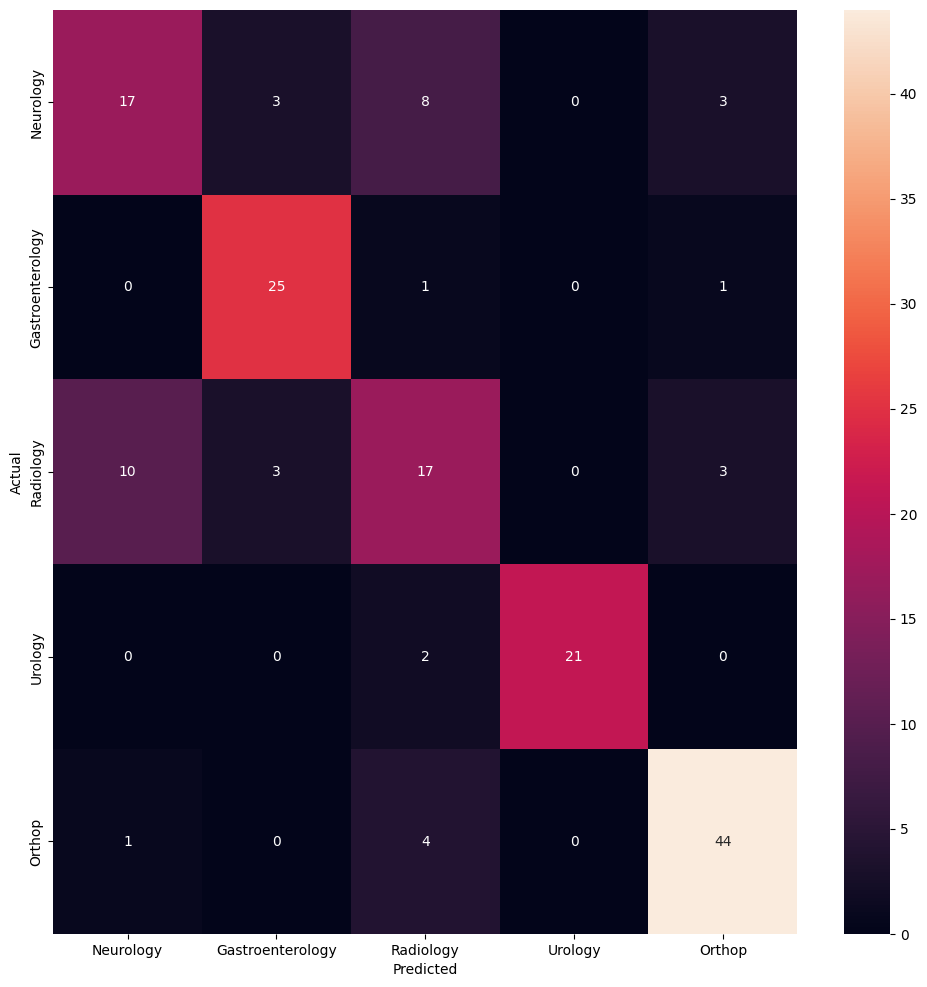

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, 
                                                                                 test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=specialty_id_df.label.values, 
            yticklabels=specialty_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
model.fit(features, labels)
N = 2

for Medical_Specialty, specialty_id in sorted(specialty_to_id.items()):
    indices = np.argsort(model.coef_[specialty_id])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Medical_Specialty))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Gastroenterology':
  . Top unigrams:
       . abdominal
       . stomach
  . Top bigrams:
       . abdominal wall
       . small bowel
# 'Neurology':
  . Top unigrams:
       . temporal
       . wave
  . Top bigrams:
       . cerebral palsy
       . photic stimulation
# 'Orthop':
  . Top unigrams:
       . joint
       . fracture
  . Top bigrams:
       . range motion
       . physical therapy
# 'Radiology':
  . Top unigrams:
       . image
       . fraction
  . Top bigrams:
       . facial bone
       . right foot
# 'Urology':
  . Top unigrams:
       . prostate
       . penis
  . Top bigrams:
       . external oblique
       . cord structure


In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, 
                                                                                 test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn import metrics

# The reported averages include micro average (averaging the total true positives, false negatives and false 
# positives), macro average (averaging the unweighted mean per label), weighted average (averaging the 
# support-weighted mean per label) and sample average (only for multilabel classification)

# Support is the number of actual occurrences of the class in the specified dataset

print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))

                  precision    recall  f1-score   support

       Neurology       0.61      0.55      0.58        31
Gastroenterology       0.81      0.93      0.86        27
       Radiology       0.53      0.52      0.52        33
         Urology       1.00      0.91      0.95        23
          Orthop       0.86      0.90      0.88        49

        accuracy                           0.76       163
       macro avg       0.76      0.76      0.76       163
    weighted avg       0.76      0.76      0.76       163



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, 
                                                                                 test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn import metrics

# The reported averages include micro average (averaging the total true positives, false negatives and false 
# positives), macro average (averaging the unweighted mean per label), weighted average (averaging the 
# support-weighted mean per label) and sample average (only for multilabel classification)

# Support is the number of actual occurrences of the class in the specified dataset

print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))


                  precision    recall  f1-score   support

       Neurology       0.58      0.45      0.51        31
Gastroenterology       0.77      0.85      0.81        27
       Radiology       0.64      0.55      0.59        33
         Urology       1.00      0.74      0.85        23
          Orthop       0.72      0.94      0.81        49

        accuracy                           0.72       163
       macro avg       0.74      0.71      0.71       163
    weighted avg       0.73      0.72      0.71       163



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, 
                                                                                 test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn import metrics

# The reported averages include micro average (averaging the total true positives, false negatives and false 
# positives), macro average (averaging the unweighted mean per label), weighted average (averaging the 
# support-weighted mean per label) and sample average (only for multilabel classification)

# Support is the number of actual occurrences of the class in the specified dataset

print(metrics.classification_report(y_test, y_pred, target_names=data['label'].unique()))

                  precision    recall  f1-score   support

       Neurology       0.60      0.48      0.54        31
Gastroenterology       0.81      0.93      0.86        27
       Radiology       0.53      0.52      0.52        33
         Urology       1.00      0.87      0.93        23
          Orthop       0.82      0.92      0.87        49

        accuracy                           0.75       163
       macro avg       0.75      0.74      0.74       163
    weighted avg       0.74      0.75      0.74       163

